## Load some libraries

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import json # to load position file
import math
from scipy.io import loadmat # to load bathymetry
from setdir import *

## Set paths and time limits

In [2]:
# Path for data
data_folder = 'data'

# Location for json file
json_file = 'positions_unit409.json'
input_json_file = os.path.join('..', data_folder, json_file)

# Location for bathymetry file
matlab_file = 'labsea_66.44W_45.68N_5min.mat'
input_bathy_file = os.path.join('..', data_folder, matlab_file)

# Time limits
datestart = '2021-12-12'
#tstart = time.mktime(datetime.datetime.strptime(datestart,'%Y-%m-%d').timetuple())
tstart = pd.Timestamp('2021-12-12T00')

## Settings for plots

In [3]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

## Load data

In [10]:
with open(input_json_file) as json_f:
    raw_json_data = json.load(json_f)
glider_path = pd.DataFrame(raw_json_data['positions']['internal'])
glider_path.head()

,time_received,time,latitude,longitude,source
0,2021-12-27T13:20:34Z,2021-12-27T13:19:34.247000Z,61.156683,-53.075800,internal
1,2021-12-27T13:42:33Z,2021-12-27T13:19:33.617000Z,61.156683,-53.075800,internal
2,2021-12-27T08:22:45Z,2021-12-27T08:18:16.097000Z,61.181967,-53.051933,internal
3,2021-12-27T08:20:39Z,2021-12-27T08:18:15.506000Z,61.181967,-53.051933,internal
4,2021-12-27T04:10:25Z,2021-12-27T04:07:04.678000Z,61.201833,-53.037467,internal


In [12]:
print(raw_json_data)

{'platform_type': 'slocum', 'platform_serial': 'unit_409', 'platform_ID': 116, 'positions': {'internal': [{'time_received': '2021-12-27T13:20:34Z', 'time': '2021-12-27T13:19:34.247000Z', 'latitude': 61.15668333, 'longitude': -53.0758, 'source': 'internal'}, {'time_received': '2021-12-27T13:42:33Z', 'time': '2021-12-27T13:19:33.617000Z', 'latitude': 61.15668333, 'longitude': -53.0758, 'source': 'internal'}, {'time_received': '2021-12-27T08:22:45Z', 'time': '2021-12-27T08:18:16.097000Z', 'latitude': 61.18196667, 'longitude': -53.05193333, 'source': 'internal'}, {'time_received': '2021-12-27T08:20:39Z', 'time': '2021-12-27T08:18:15.506000Z', 'latitude': 61.18196667, 'longitude': -53.05193333, 'source': 'internal'}, {'time_received': '2021-12-27T04:10:25Z', 'time': '2021-12-27T04:07:04.678000Z', 'latitude': 61.20183333, 'longitude': -53.03746667, 'source': 'internal'}, {'time_received': '2021-12-27T04:08:25Z', 'time': '2021-12-27T04:07:03.958000Z', 'latitude': 61.20183333, 'longitude': -53

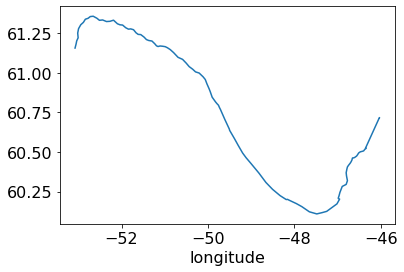

In [5]:
# Simple figure of path
glider_path.plot(x='longitude',y='latitude')
ax1 = plt.gca()
ax1.legend().remove()

## Load bathymetry

In [6]:
mat_data = loadmat(input_bathy_file)
bathy_data = mat_data['bathy']
lat = bathy_data['lat'][0][0].flatten()
lon = bathy_data['lon'][0][0].flatten()
dep = bathy_data['depth'][0][0]
[len(lat), len(lon), dep.shape]

[276, 265, (276, 265)]

### Simple bathy plot

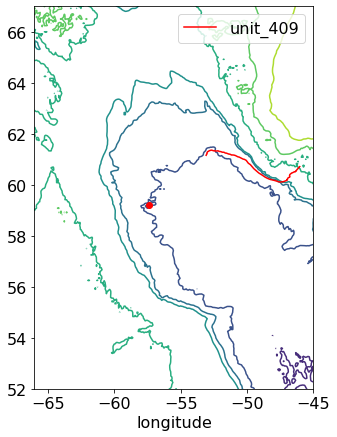

In [7]:
# Choose axis limits
latlim = [52, 67]
lonlim = [-66, -45]
# Choose aspect ratio
np.mean(latlim)
ratio = np.cos(np.mean(latlim)*np.pi/180)

# This one is for axes, but I'm not sure it works the way I'd expect
def forceAspect(ax,ratio):
    xleft, xright = ax.get_xlim()
    ybottom, ytop = ax.get_ylim()
    ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

# This one is for figure sizes when there's only one axis
def compute_ysize(xsize,lonlim,latlim):
    scale_lon = np.cos(np.mean(latlim)*np.pi/180)
    dlon = lonlim[1]-lonlim[0]
    dlat = latlim[1]-latlim[0]
    ysize = xsize/(dlon*scale_lon)*dlat
    return ysize

axes = plt.subplots(nrows=1, ncols=1)
ax1 = plt.subplot(1,1,1)
ax1.contour(lon, lat, dep)
ax1.set_ylim(latlim)
ax1.set_xlim(lonlim)
#forceAspect(ax1,1/ratio)
fig = plt.gcf()

glider_path.plot(x='longitude',y='latitude', color='r', ax=ax1)
plt.legend(['unit_409'])
#ax1.legend().remove()

xsize = 5
ysize = compute_ysize(xsize, lonlim, latlim)

fig.set_size_inches(xsize, ysize)

#fig.savefig('output.png')
save_figure(fig,'map_unit409')

newloc = [(-57.410322580645165, 59.22331011804697)]
newloc = newloc[0]
lonnew = newloc[0]
latnew = newloc[1]
d = {'one' : lonnew,
     'two' : latnew}
df = pd.DataFrame(d, index=[0])
plt.plot(df['one'], df['two'],'ro')

# Now convert to decimal minutes

In [38]:
lonnew = -57.410322580645165


def dec2deg(dec1):
    if dec1==0:
        deg1 = 0
        mindec = 0
        degstr = str(deg1)+u"\N{DEGREE SIGN}"
    else:
        if dec1<0:
            dec1 = abs(dec1)
            dirstr = 'W/S'
        elif dec1>0:
            dirstr = 'E/N'

        deg1 = math.floor(dec1)
            
        mindec = round(100*(dec1-deg1)*60)/100
        
        if mindec==60:
            deg1 += deg1
            mindec = 0
            
        if mindec==0:
            degstr = str(deg1)+u"\N{DEGREE SIGN}"+dirstr
        else:
            degstr = str(deg1)+u"\N{DEGREE SIGN}"+str(mindec)+dirstr
            
    return degstr

degstr = dec2deg(lonnew)
print(degstr)
degstr = dec2deg(latnew)
print(degstr)


57°24.62W/S
59°13.4E/N


In [ ]:
        

decmin = 60*(round(lonnew)-lonnew)
decmin = round(decmin*100)/100
print(decmin)

degstr = str(abs(londeg))
decminstr = str(abs(decmin))

if lonnew < 0:
    dirstr = 'W'
else:
    dirstr = 'E'

degstr = degstr+u"\N{DEGREE SIGN}"+decminstr+dirstr

print(degstr)

## Try the same but with ginput to pick a new waypoint

In [1]:
#%matplotlib qt
# Choose axis limits
latlim = [52, 67]
lonlim = [-66, -45]

## Make the plot
axes = plt.subplots(nrows=1, ncols=1)
ax1 = plt.subplot(1,1,1)
ax1.contour(lon, lat, dep)
ax1.set_ylim(latlim)
ax1.set_xlim(lonlim)
#forceAspect(ax1,1/ratio)
fig = plt.gcf()

glider_path.plot(x='longitude',y='latitude', color='r', ax=ax1)
plt.legend(['unit_409'])
#ax1.legend().remove()

xsize = 5
ysize = compute_ysize(xsize, lonlim, latlim)

fig.set_size_inches(xsize, ysize)
plt.ginput(1)

NameError: name 'plt' is not defined

In [36]:
newloc = [(-57.410322580645165, 59.22331011804697)]
newloc = newloc[0]

In [38]:
lonnew = newloc[0]
latnew = newloc[1]
plt.scatter(x=lonnew, y=latnew,ax=ax1,color='r+')

TypeError: inner() got multiple values for argument 'ax'